# Climate Analysis

In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

In [3]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, join

In [4]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
Base.classes.keys()

['measurement', 'station']

In [7]:
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
session = Session(engine)

In [9]:
inspector = inspect(engine)

In [10]:
inspector.get_table_names()

['measurement', 'station']

In [11]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c["name"], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
columns = inspector.get_columns('Station')
for c in columns:
    print(c["name"], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [13]:
results_m = session.query(Measurement.id, Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs)


In [14]:
df = pd.DataFrame(results_m[:], columns=["id", "station", "date", "prcp", "tobs"])
df.set_index("id", inplace=False)
df.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [15]:
df_1year = df.loc[df["id"] >= 2364]
df_1year.head()

,id,station,date,prcp,tobs
2363,2364,USC00519397,2016-08-23,0.00,81.0
2364,2365,USC00519397,2016-08-24,0.08,79.0
2365,2366,USC00519397,2016-08-25,0.08,80.0
2366,2367,USC00519397,2016-08-26,0.00,79.0
2367,2368,USC00519397,2016-08-27,0.00,77.0


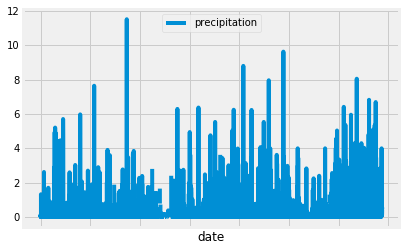

In [16]:
fix, ax = plt.subplots()
ypos = range(1, len(df_1year)+1)
ax.plot(ypos, df_1year["prcp"])
ax.set_xlabel("date")
ax.tick_params(bottom=False,
               labelbottom=False)
ax.legend(["precipitation"], loc="upper center")

In [17]:
df_1year.agg({"prcp": "describe"})

,prcp
count,15777.000000
mean,0.177005
std,0.493254
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,11.530000


In [18]:
station_count = session.query(Measurement).\
group_by(Measurement.station).count()
print(station_count)

9


In [19]:
df_1year_sort = df_1year.agg({"station": "value_counts"})

In [20]:
df_1year_sort.sort_values(by="station", ascending=False)

,station
USC00519281,2772
USC00513117,2709
USC00519523,2669
USC00516128,2612
USC00514830,2202
USC00511918,1979
USC00517948,1372
USC00518838,511
USC00519397,361


In [21]:
top_station = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
order_by(func.max(Measurement.tobs).desc()).all()
for station in top_station:
    print(station)

(53.0, 87.0, 73.09795396419437)


In [22]:
results_s = session.query(Station.id, Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation)

In [23]:
d_s = pd.DataFrame(results_s[:], columns=["id", "station", "name", "latitude", "longitude", "elevation"])
d_s.set_index("id", inplace=True)
d_s.head()

,station,name,latitude,longitude,elevation
id,,,,,
1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


In [24]:
top_station = session.query(Measurement.id, Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs).\
  filter(Measurement.station == "USC00519281")


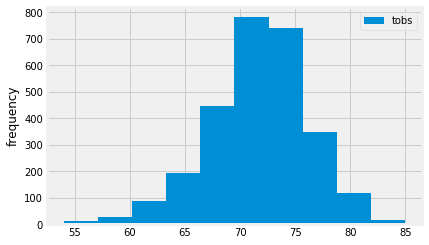

In [25]:
top_df = df_1year.loc[df_1year["station"] == "USC00519281"]

#top_df

fig, ax = plt.subplots()
ax.hist(top_df["tobs"])
ax.set_ylabel("frequency")
ax.legend(["tobs"], loc="best")

In [26]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [27]:
bar =  calc_temps('2016-08-23', '2017-08-23')
print(bar)

[(58.0, 74.59058295964125, 87.0)]


In [ ]:


fig, ax= plt.subplots(figsize=(3,7))
ax.bar(1,74.59058295964125, color="coral", alpha=0.55)
ax.tick_params(bottom=False,
               labelbottom=False)
ax.grid(which="major", axis="x")
ax.errorbar(1,74.59058295964125,yerr=87.0-58.0, ecolor="black")
ax.set_ylabel("Temp (F)")
ax.set_title("Trip Avg Temp")
plt.tight_layout()


In [152]:
results = session.query(station.Station, station.name, station.latitude, station.longitude, station.elevation, measurment.prcp).\
filter(Measurement.date == "2016-08-23").all()
for result in results:
    print(result)

AttributeError: 'result' object has no attribute 'Station'

In [165]:
results = session.query(Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation, Measurement.prcp).\
filter(Measurement.station==Station.station).filter(Measurement.date == "2016-08-23").order_by(Measurement.prcp.desc()).all()
for result in results:
    print(result)

('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 1.79)
('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 0.7)
('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.15)
('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.05)
('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.02)
('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0)
('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, None)


# Optional Asignment


In [194]:
def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = (Measurement.date, func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs))
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")
 

[('2011-01-01', 62.0, 69.15384615384616, 77.0)]

In [202]:
day1 = list(daily_normals("01-01"))
day2 = list(daily_normals("01-02"))
day3 = list(daily_normals("01-03"))
day4 = list(daily_normals("01-04"))
day5 = list(daily_normals("01-05"))
day6 = list(daily_normals("01-06"))
day7 = list(daily_normals("01-07"))
normals = [day1, day2, day3, day4, day5, day6, day7]